In [1]:
# 12/12/2021-1
# https://www.tensorflow.org/hub/tutorials/tf2_image_retraining
from __future__ import absolute_import
from IPython.display import clear_output
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from os.path import exists, join

contentPath = os.getcwd()
cv2Path=join(contentPath, 'CV2Images')
testPath=join(contentPath, 'images')

import itertools
import glob, os, time
from time import sleep

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from CV2_Utils import *

for fil in glob.glob('*.h5'):
    print(fil)

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
print('cwd: ', os.getcwd())

Defcon4_Sequential_V3.h5
TF version: 2.7.0
Hub version: 0.12.0
GPU is NOT AVAILABLE
cwd:  /home/jovyan


In [2]:
# import tensorflow.keras.preprocessing.image_dataset_from_directory
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    testPath,
    color_mode='rgb',
    image_size=(224, 224),
    batch_size = 1)
# clear_output()

Found 2 files belonging to 1 classes.


In [3]:
IMAGE_SIZE=(224, 224)
BATCH_SIZE = 1

import tensorflow
from tensorflow.keras.utils import image_dataset_from_directory

class_names = tuple(test_ds.class_names)
train_size = test_ds.cardinality().numpy()
test_ds = test_ds.unbatch().batch(BATCH_SIZE)
test_ds = test_ds.repeat()
test_ds

# normalization_layer = tf.keras.layers.Rescaling(1. / 255)
# preprocessing_model = tf.keras.Sequential([normalization_layer])

<RepeatDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [4]:

import cv2
from CV2_Utils import *
modelPath = join(contentPath, "Defcon4_Sequential_V3.h5")
newModel = tf.keras.models.load_model(modelPath, compile=True)
# newModel.summary()
# element=test_ds.get_single_element()
img = test_ds.take(1)
img = np.expand_dims(img, axis = 0) 
# cvu.plotShowSingleImage(img)
img.shape

(1,)

In [11]:
os.chdir(testPath)
testImageList=[]
testImageGlob = glob.glob('**', recursive=True)
for fil in testImageGlob:
    fullPath = abspath(fil)
    if isfile(fullPath):
        testImageList.append(fullPath)
        print(fullPath)
        img = cv2.imread(fullPath)
os.chdir(contentPath)

/home/jovyan/images/TestImages/friendly_validation_12.png
/home/jovyan/images/TestImages/friendly_validation_13.png


/home/jovyan/images/TestImages/friendly_validation_12.png


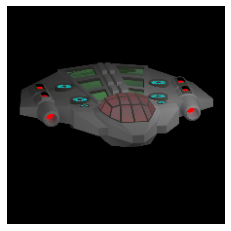

prediction: 1

/home/jovyan/images/TestImages/friendly_validation_13.png


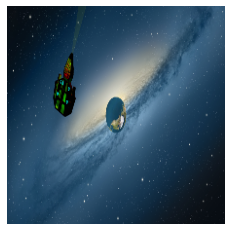

prediction: 1



In [13]:
import numpy as np
from keras.preprocessing import image
for item in testImageList:
    img_width, img_height = 224, 224
    # img = image.load_img(testImageList[0], target_size = (img_width, img_height)
    print(item)
    img = cv2.imread(item)
    img = cv2.resize(img, dsize=(224, 224))
    cvu.plotShowSingleImage(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0) # reshape img for prediction 
    # print(f'prediction shape: {img.shape}')
    
    prediction = newModel.predict(img)
    prediction = np.argmax(prediction)
    print(f'prediction: {prediction}\n')
    
    sleep(1)
    img = None